In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [10]:
(data, labels), _ = tf.keras.datasets.mnist.load_data()
data = data.reshape(data.shape[0], -1)
small_data = data[:5000]
small_labels = labels[:5000].reshape(-1, 1)
std_data = StandardScaler().fit_transform(small_data)

In [29]:
perplexities = range(30, 101, 20)
n_iters = range(1000, 5001, 1000)

In [27]:
def transform(obj, title):
    print("Fitting started")
    data_2D = tsne.fit_transform(std_data)
    print("Done fitting")
    data_2D_with_labels = np.hstack((data_2D, small_labels))
    data_df = pd.DataFrame(data_2D_with_labels, columns=['dim1', 'dim2', 'class'])
    sns.FacetGrid(data_df, hue='class', height=5).map(plt.scatter, 'dim1', 'dim2').add_legend()
    plt.title(title)
    plt.show()

-----------Varying perplexities----------

Fitting started
Done fitting


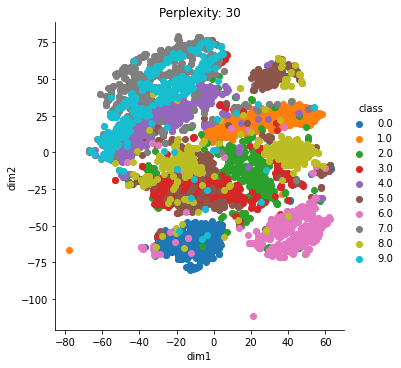

Fitting started
Done fitting


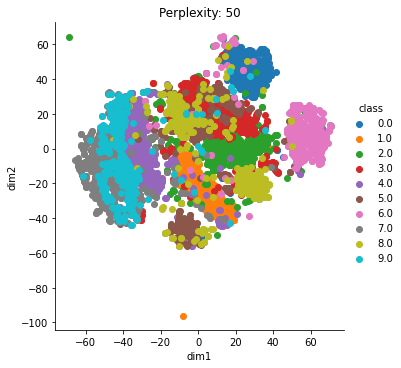

Fitting started
Done fitting


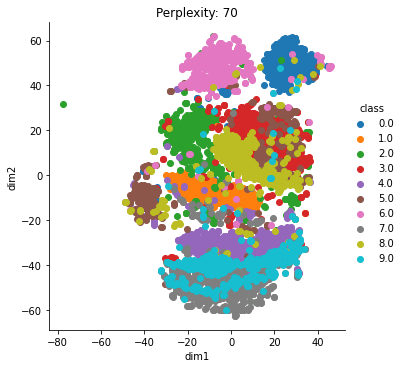

Fitting started
Done fitting


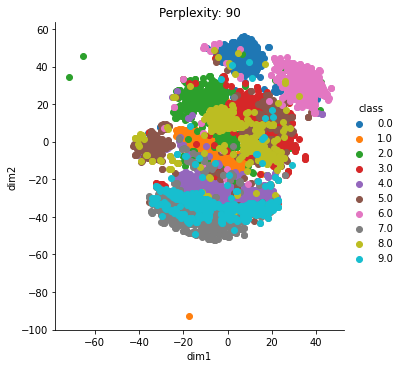

In [28]:
print(f"-----------Varying perplexities----------\n")
for perplex in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplex, random_state=0)
    transform(tsne, f"Perplexity: {perplex}")

30-50-70 perplexities perform the same  
we can choose 50

-----------Varying n_iterations----------

Fitting started
Done fitting


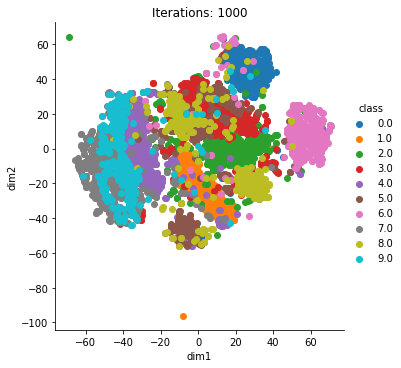

Fitting started
Done fitting


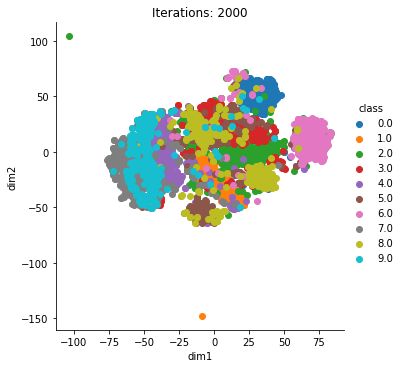

Fitting started
Done fitting


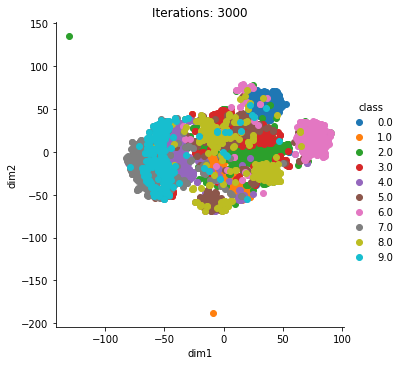

Fitting started
Done fitting


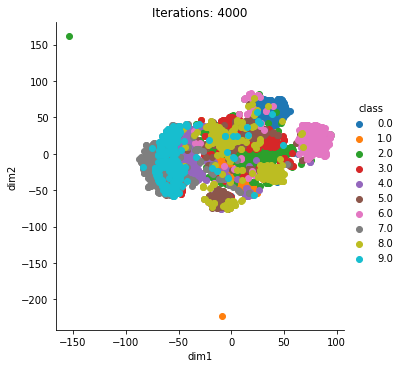

Fitting started
Done fitting


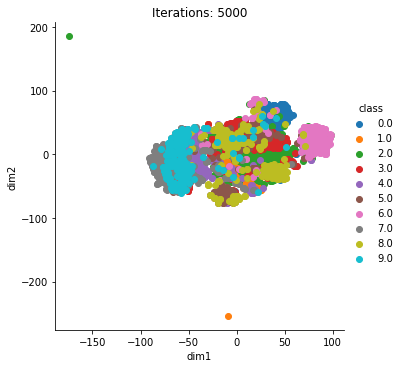

Fitting started


KeyboardInterrupt: ignored

In [31]:
print(f"-----------Varying n_iterations----------\n")
for n_iter in n_iters:
    tsne = TSNE(n_components=2, perplexity=50, n_iter=n_iter, random_state=0)
    transform(tsne, f"Iterations: {n_iter}")

Higher iterations are just making it worse  
So, we fix to default 1000